# Perceptron

## Linære separatorer

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def tegn_kluster():
    np.random.seed(0)
    x1 = np.random.normal(1, 0.2, 10)
    y1 = np.random.normal(1, 0.2, 10)
    x2 = np.random.normal(3, 0.2, 10)
    y2 = np.random.normal(3, 0.2, 10)

    plt.scatter(x1, y1, color='blue', label='Cluster 1')
    plt.scatter(x2, y2, color='red', label='Cluster 2')


### Eksempel 1

Eksempel på hvordan man kan bruke *ax + b* for å skille mellom to klasser av punkter i et 2D-plot.

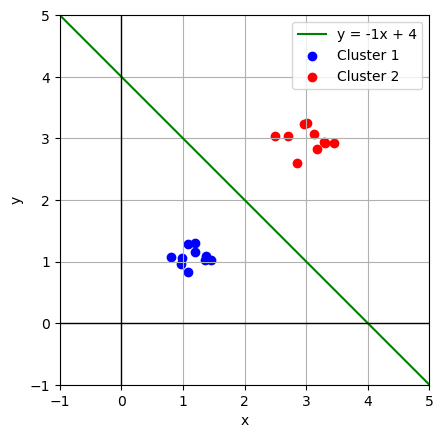

In [22]:
def eksempel_1(a=-1, b=4):
    x_line = np.linspace(-1, 5, 100)
    y_line = a * x_line + b
    plt.plot(x_line, y_line, color='green', label=f'y = {a}x + {b}')

    # Plotting
    tegn_kluster()

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.grid(True)
    plt.axis('scaled')
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)

    plt.show()


eksempel_1(a=-1, b=4)


### Eksempel 2

Eksempel på hvordan man kan bruke *w₁x₁ + w₂x₂ + b* for å skille mellom to klasser av punkter i et 2D-plot.

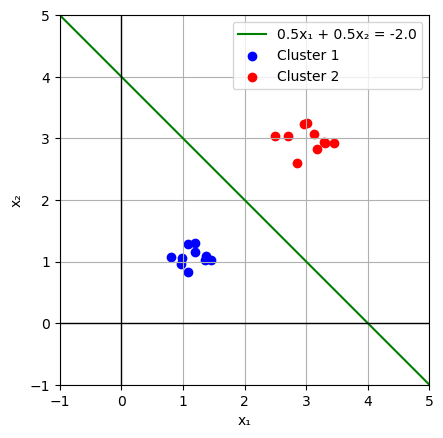

In [39]:
def eksempel_2(w1=0.5, w2=0.5, b=-2):

    # w1*x + w2*y = -b  ->  y = (-b - w1*x) / w2
    x_line = np.linspace(-1, 5, 100)
    y_line = (-b - w1 * x_line) / w2
    plt.plot(x_line, y_line, color='green', label=f'{w1:.1f}x₁ + {w2:.1f}x₂ = {b:.1f}')

    # Plotting
    tegn_kluster()

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()

    plt.grid(True)
    plt.axis('scaled')
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)

    plt.show()


eksempel_2(w1=0.5, w2=0.5, b=-2)

## Perceptron

### Perceptronens potensiale

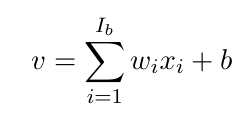

In [ ]:
def perceptron_potensiale(w: list[float], x: list[float], b=1):
    v = 0
    I_b = len(w)
    for i in range(I_b):
        v += w[i] * x[i]

    return v + b

### Aktiveringsfunksjon

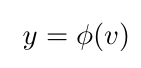

In [30]:
def linear(x):
    return x

def step(x):
    return np.where(x >= 0, 1.0, 0.0)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, a=0.1):
    return np.where(x >= 0, x, a * x)


#### Plotting av aktiveringsfunksjoner

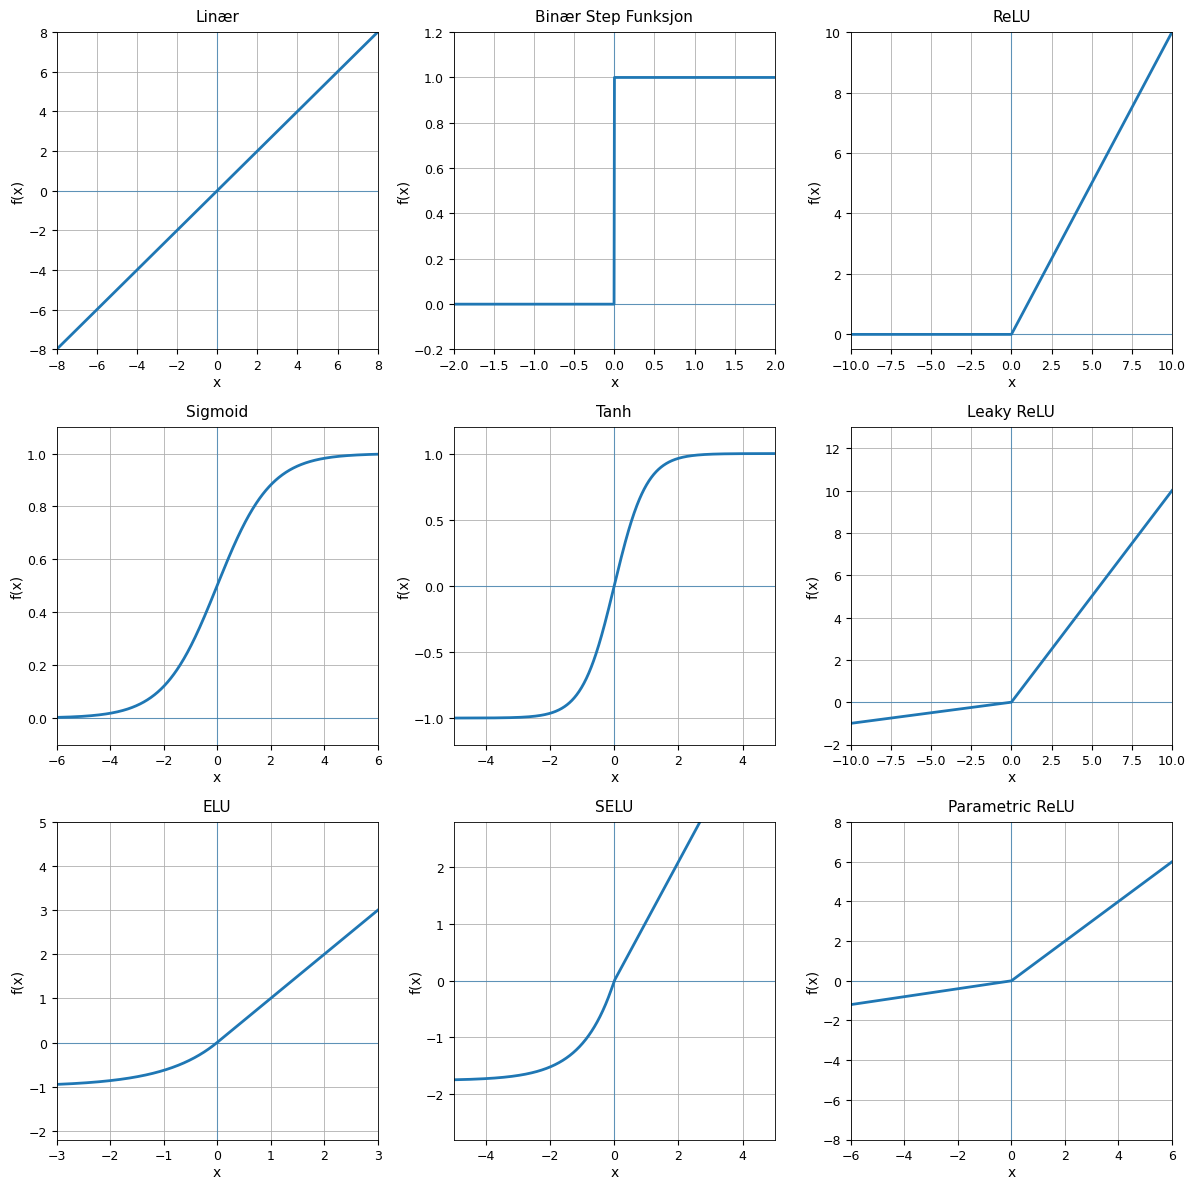

In [31]:
def plot_aktiveringsfunksjoner():
    plots = [
        ("Linær", linear, (-8, 8), (-8, 8)),
        ("Binær Step Funksjon", step, (-2, 2), (-0.2, 1.2)),
        ("ReLU", relu, (-10, 10), (-0.5, 10)),
        ("Sigmoid", sigmoid, (-6, 6), (-0.1, 1.1)),
        ("Tanh", tanh, (-5, 5), (-1.2, 1.2)),
        ("Leaky ReLU", lambda x: leaky_relu(x, 0.1), (-10, 10), (-2, 13)),
    ]

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    for ax, (title, f, xlim, ylim) in zip(axes.ravel(), plots):
        for spine in ax.spines.values():
            spine.set_linewidth(0.6)

        x = np.linspace(xlim[0], xlim[1], 800)
        y = f(x)
        ax.plot(x, y, linewidth=2)

        ax.axhline(0, linewidth=0.8, alpha=0.6)
        ax.axvline(0, linewidth=0.8, alpha=0.6)
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
        ax.grid(True, linewidth=0.6)
        ax.set_title(title, fontsize=11, pad=8)
        ax.tick_params(labelsize=9)

        ax.set_xlabel("x", labelpad=2)
        ax.set_ylabel("f(x)", labelpad=2)

    plt.tight_layout()
    plt.show()


plot_aktiveringsfunksjoner()

### Aktiveringsfunksjon derivert

In [ ]:
def linear_dx(x):
    return 1.0

def step_dx(x):
    return 0.0

def relu_dx(x):
    return np.where(x >= 0, 1.0, 0.0)

def sigmoid_dx(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_dx(x):
    t = tanh(x)
    return 1 - t**2

def leaky_relu_dx(x, a=0.1):
    return np.where(x >= 0, 1.0, a)


#### Plotting av aktiveringsfunksjoner derivert

In [ ]:
def plot_aktiveringsfunksjoner_derivert():
    plots = [
        ("Linær Derivert", linear_dx, (-8, 8), (-0.2, 1.2)),
        ("Binær Step Funksjon Derivert", step_dx, (-2, 2), (-0.2, 1.2)),
        ("ReLU Derivert", relu_dx, (-10, 10), (-0.2, 1.2)),
        ("Sigmoid Derivert", sigmoid_dx, (-6, 6), (-0.1, 0.3)),
        ("Tanh Derivert", tanh_dx, (-5, 5), (-0.1, 1.1)),
        ("Leaky ReLU Derivert", lambda x: leaky_relu_dx(x, 0.1), (-10, 10), (-0.2, 1.2)),
    ]

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    for ax, (title, f, xlim, ylim) in zip(axes.ravel(), plots):
        for spine in ax.spines.values():
            spine.set_linewidth(0.6)

        x = np.linspace(xlim[0], xlim[1], 800)
        y = f(x)
        ax.plot(x, y, linewidth=2)

        ax.axhline(0, linewidth=0.8, alpha=0.6)
        ax.axvline(0, linewidth=0.8, alpha=0.6)
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
        ax.grid(True, linewidth=0.6)
        ax.set_title(title, fontsize=11, pad=8)
        ax.tick_params(labelsize=9)

        ax.set_xlabel("x", labelpad=2)
        ax.set_ylabel("f'(x)", labelpad=2)

    plt.tight_layout()
    plt.show()

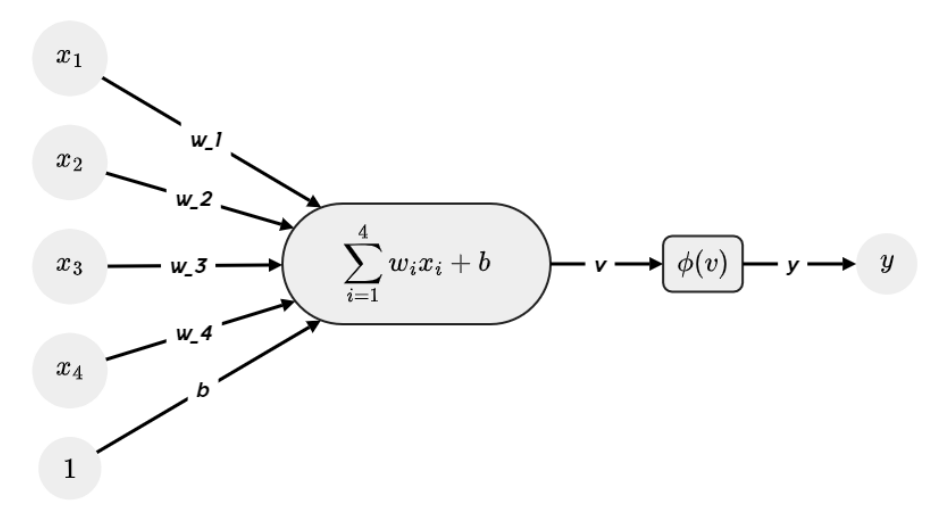

## Vektorform

### Inkorporering av bias

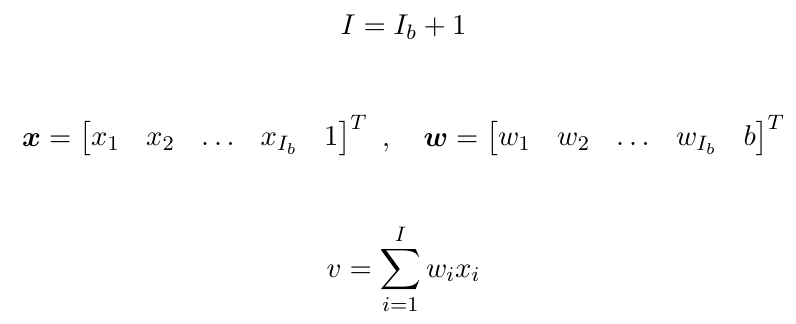

### Perceptron i vektorform

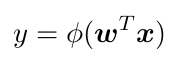

In [32]:
def perceptron(w: np.ndarray, x: np.ndarray):
    return step(np.dot(w, x))

### Eksempel på perceptron

Lager en perceptron med vekter *w = [0.5, 0.5]* og bias *b = -2*.

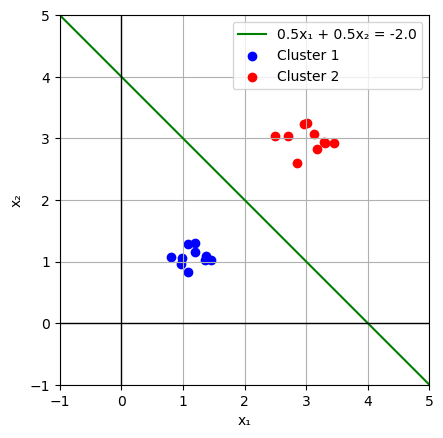

Input: (1, 1), Output: 0.0
Input: (2, 2), Output: 1.0
Input: (3, 3), Output: 1.0
Input: (0, 0), Output: 0.0
Input: (1, 3), Output: 1.0
Input: (3, 0), Output: 0.0
Input: (3, 1), Output: 1.0


In [43]:
def eksempel_perceptron(w: np.ndarray):
    test_punkter = [
        np.array([1, 1, 1]),
        np.array([2, 2, 1]),
        np.array([3, 3, 1]),
        np.array([0, 0, 1]),
        np.array([1, 3, 1]),
        np.array([3, 0, 1]),
        np.array([3, 1, 1]),
    ]

    for p in test_punkter:
        resultat = perceptron(w, p)
        print(f"Input: {(p[0], p[1])}, Output: {resultat}")


eksempel_2(w1=0.5, w2=0.5, b=-2)
eksempel_perceptron(np.array([0.5, 0.5, -2]))